# why are normalized images inverted?  

lets find out if they actually are

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'
import progressbar
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
%matplotlib inline

In [3]:
def normalize_input(train_data, test_data):
    '''
    normailizing input across each pixel an each channel (i.e. normalize for each input to network).
    '''
    mean, std_dev = np.mean(train_data, axis=0), np.std(train_data, axis=0)
    return (train_data - mean) / std_dev, (test_data - mean) / std_dev

In [6]:
# data input
data_path = 'https://raw.githubusercontent.com/michaelneuder/image_quality_analysis/master/data/sample_data/'

# train data --- 500 images, 96x96 pixels
orig_500 = pd.read_csv('{}orig_500.txt'.format(data_path), header=None, delim_whitespace = True).values
recon_500 = pd.read_csv('{}recon_500.txt'.format(data_path), header=None, delim_whitespace = True).values

# test data --- 140 images, 96x96 pixels
orig_140 = pd.read_csv('{}orig_140.txt'.format(data_path), header=None, delim_whitespace = True).values
recon_140 = pd.read_csv('{}recon_140.txt'.format(data_path), header=None, delim_whitespace = True).values

In [9]:
# reshape
orig_500 = np.reshape(orig_500, [500,96,96,1])
orig_140 = np.reshape(orig_140, [140,96,96,1])
recon_500 = np.reshape(recon_500, [500,96,96,1])
recon_140 = np.reshape(recon_140, [140,96,96,1])

In [10]:
orig_500_norm, orig_140_norm = normalize_input(orig_500, orig_140)
recon_500_norm, recon_140_norm = normalize_input(recon_500, recon_140)

In [12]:
orig_500_norm.shape

(500, 96, 96, 1)

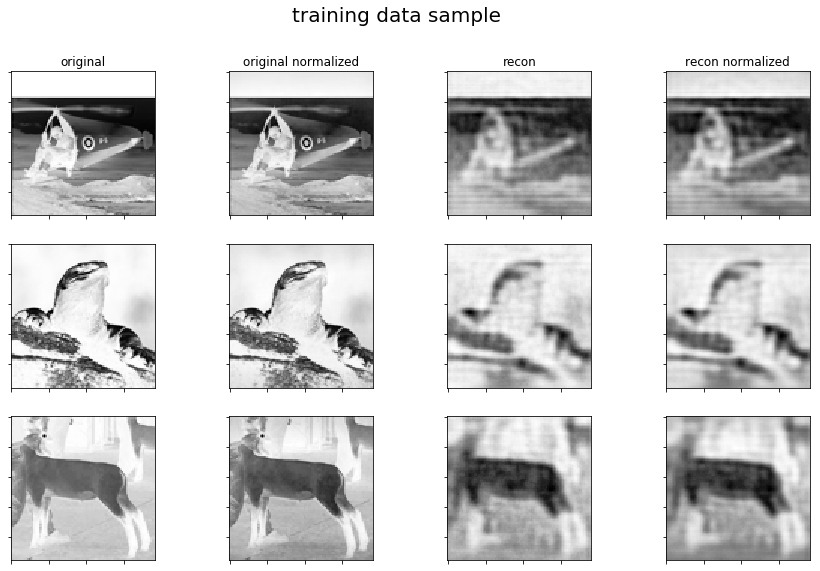

In [20]:
f, axarr = plt.subplots(nrows=3,ncols=4, figsize=(15,9))
for i in range(3):
    axarr[i,0].imshow(orig_500[i,:,:,0], cmap='Greys')
    axarr[i,1].imshow(orig_500_norm[i,:,:,0], cmap='Greys')
    axarr[i,2].imshow(recon_500[i,:,:,0], cmap='Greys')
    axarr[i,3].imshow(recon_500_norm[i,:,:,0], cmap='Greys')

axarr[0,0].set_title('original')
axarr[0,1].set_title('original normalized')
axarr[0,2].set_title('recon')
axarr[0,3].set_title('recon normalized')
for ax_row in axarr:
    for ax in ax_row:
        ax.set_xticklabels([])
        ax.set_yticklabels([])

f.suptitle('training data sample', size=20)
plt.savefig('image_norm.png')
plt.show()

In [27]:
orig_500[100,0,:,0], orig_500_norm[100,0,:,0]

(array([ 61,  17,  26,  92, 187, 147,  83,  86, 110, 171, 216, 224, 227,
         92,  36,  47,  58,  38,  26,  21,  22,  29,  28,  12,  11,  24,
         59,  76,  72,  53,  38,  49,  62,  32,  49,  39, 145, 169, 186,
        136, 137, 142,  35,  28, 104, 144, 129, 106, 124, 133, 133, 125,
        115, 122, 139, 152, 166, 161, 131,  99,  94, 112, 127, 126, 114,
        108, 110, 125, 144, 145, 137, 140, 145, 147, 157, 158, 155, 146,
        125,  95,  89, 104, 110, 114, 118, 123, 134, 144, 141, 129, 126,
        130, 129, 121, 116, 119]),
 array([-0.34778828, -0.947754  , -0.82383332,  0.04053803,  1.25364056,
         0.7330047 , -0.10396143, -0.05691895,  0.24698269,  1.02014793,
         1.60201033,  1.70579555,  1.71854594, -0.03645719, -0.76849126,
        -0.63629227, -0.48987601, -0.75656057, -0.91603368, -0.98795875,
        -0.98583192, -0.88460497, -0.89164327, -1.09905601, -1.11142142,
        -0.92922705, -0.47969806, -0.26933249, -0.32206966, -0.57740757,
        -0.77730